# Homework #8

## PHYS 2600, Spring 2019

__Important notice:__ All cells in your notebook will be run, start to finish, using a fresh kernel when it is graded!  To make sure the graded notebook looks like what you expect, we recommend restarting the kernel and selecting "Cells > Run All" in the menu above before you submit.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

If you worked collaboratively on this assignment, __include the names of your collaborators in the cell below:__

## 8.0 - Homework correction (3 points)

In the cell below, explain and correct __one mistake__ you made on your _last graded_ homework assignment.  If you got a perfect score, great, tell us what your favorite problem was, or use the space to give any other feedback you might have on the class/tutorials/homework.

Can we have the solution of tuturial earlier? Sometimes when I am struggling on my HW and need to look up the solution of tutorial. I have to wait until the weekend to finish the hw. 

## 8.1 - Declarative programming and list comprehensions (18 points)

_(Special note: this problem first appeared as problem T16.2 on tutorial 16.  If you already did some or all of it there, you may copy and paste your solutions here.  __The instructions have changed slightly__ to use automatic tests, so don't forget to re-read the instructions if you copy and paste!)_

### Part A (6 points)

Using a list comprehension, make a list of __powers of 1/2 from 0 to 10__, i.e. the 0th power through the 10th power including both ends.  (The last entry will be $1/2^{10} = 1/1024 \approx 0.000977.$)

__Save your list to the variable `powers_of_half`.__

In [2]:
## YOUR CODE HERE
powers_of_half = [ (1/2)**x for x in range(0,11) ]

In [3]:
print(powers_of_half)


[1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625]


Now, again using a list comprehension, find the __sum of the square roots of all even integers from 1 to 30__.

_(Hint: you'll need the `for...in...if...` notation to include the filter for even integers here.  The answer should be about 57.2.)_

__Save your answer to the variable `sum_of_roots`.__

In [4]:
## YOUR CODE HERE
import numpy.testing as npt

sum_of_roots = sum([ x**0.5 for x in range(1,31) if x%2 == 0 ])

In [5]:
print(sum_of_roots)

npt.assert_allclose(sum_of_roots, 57.23, atol=1e-2)

57.232086690264815


One more simple math question for a list comprehension: __what is the product of the first five powers of 3__ (i.e. the product of 3, 9, 27, 81, and 243)?

_(Hint: this isn't a sum, so you'll need to make your own reduction with `functools.reduce()`.  You can use a `lambda` to do it all in one line, but using `def` to set up for the reduction first is fine too.)_

__Save your answer to the variable `product_of_powers`.__

In [6]:
## YOUR CODE HERE
import functools

product_of_powers = functools.reduce(lambda x,y: x*y, [3,9,27,81,243])

In [7]:
print(product_of_powers)

npt.assert_allclose(product_of_powers, 3*9*27*81*243)

14348907


### Part B (6 points)

Below is a function called `grade_to_GP`, which converts from letter grades to the equivalent grade-point score using the matching pair of lists `letter_grades` and `numeric_grades`.  Following that, I've given a list of letter grades - a distribution for some class in one semester at CU, perhaps.

__Use a list comprehension and the `sum()` function__ to convert `some_letter_grades` into a numerical grade-point averge.

__Save your answer to the variable `some_GPA`.__

In [8]:
letter_grades = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
numeric_grades = [4.0, 3.7, 3.3, 3.0, 2.7, 2.3, 2.0, 1.7, 1.3, 1.0, 0.7, 0.0]

def grade_to_GP(g):
    grade_i = letter_grades.index(g)
    return numeric_grades[grade_i]

some_letter_grades = [
    'A', 'A-', 'C', 'B+', 'B+',
    'A', 'A', 'A', 'A', 'A',
    'F', 'A', 'A-', 'C', 'B-',
    'B-', 'A-', 'B-', 'C+', 'B',
    'D', 'B', 'C-', 'C+', 'B+',
]

In [9]:
## YOUR CODE HERE
some_GPA = round(sum([grade_to_GP(g) for g in some_letter_grades])/25, 3)

In [10]:
print(some_GPA)


2.976


Now consider instead the list `some_student_grades` below, which is a list of lists, each sub-list consisting of 5 letter grades.  (Each list could be the grades of a student for a single semester at CU.)  __Use a list comprehension to find a list of grade-point averages__ for each student, and __save it to the variable `student_GPAs`__ for testing. 

_(Hint: you can use a list comprehension inside of another list comprehension, which can be a nice way to deal with nested lists.)_

In [11]:
some_student_grades = [
    ['B', 'B+', 'C-', 'B+', 'B+'],
    ['A', 'A', 'A-', 'B', 'B+'],
    ['C', 'A', 'A-', 'B-', 'C+'],
    ['A-', 'A-', 'B+', 'A', 'F'],
    ['D', 'B-', 'C', 'C+', 'B-'],
    ['B+', 'A-', 'B', 'C+', 'B+'],
]

In [12]:
## YOUR CODE HERE
student_GPAs = [round(sum([grade_to_GP(g) for g in one_student_grades])/5, 2) for one_student_grades in some_student_grades]

In [13]:
print(student_GPAs)
npt.assert_allclose(student_GPAs, [2.92, 3.60, 2.94, 2.94, 2.14, 3.12], atol=1e-2)

[2.92, 3.6, 2.94, 2.94, 2.14, 3.12]


### Part C (6 points)

The list in the next cell contains tuples of measurements `(P, T)` of pressure and temperature for 10 moles of nitrogen gas in an expandable box.  We'll assume the ideal gas law

\\[
PV = nRT
\\]

with the gas constant $R = 8.314$ J / (mol K), and remember that one kilopascal (kPa) is equal to 1000 $J/m^3$.

Using a list comprehension, __create a list of volumes__ for each `(P, T)` tuple.  __Save your answer to the variable `vols`__.

In [14]:
gas_meas = [  # (P, T) in units (kPa, K)
    (130, 300),
    (110, 340),
    (265, 550),
    (80, 460),
]
gas_meas

[(130, 300), (110, 340), (265, 550), (80, 460)]

In [15]:
## YOUR CODE HERE
def F(item):
    (P, T) = item
    return 10*8.314*T/(P*1000)

vols = [F(item) for item in gas_meas]

In [16]:
print(vols)

npt.assert_allclose(vols, [0.192, 0.257, 0.173, 0.478], atol=1e-3)

[0.19186153846153847, 0.25697818181818183, 0.1725547169811321, 0.478055]


Now a slightly different experiment.  We hold our box at room temperature $T = 300$ K and atmospheric pressure $P = 80$ kPa, and introduce a mixture of two gases, nitrogen (28 g/mol) and carbon dioxide (44 g/mol).  Based on the weight of the gases we add, we'd like to know the final volume of our expandable container.

__Implement the function `vol_from_weights(m_N2, m_CO2)` below__, which should take the weights (in kg) of each of the two gases mixed in to the container and return the volume.  (With two species of gas, we still use the ideal gas law, just adding the number of moles from each gas to get the total $n$.)

Then __use a list comprehension__ to get a list of volumes corresponding to each pair of mass values in `masses_N2` and `masses_CO2`.  (The masses represent 8 experiments total, for example the first experiment used a mixture of `masses_N2[0]` nitrogen and `masses_CO2[0]` carbon dioxide.)

Oh, one more thing: we had a measurement error occur when one of our friends came by and leaned on the apparatus, throwing off the weight measurements badly.  __Include a filter to remove any experiments where the weight of either gas is over 1 kg.__

__Save your answer to the variable `filtered_vols`__.

In [17]:
masses_N2 = [0.30989415, 4.30978635, 0.13382561, 0.1652629 , 0.01619259,
       0.2213031 , 0.12360093, 0.06485605]
masses_CO2 = [0.15333776, 0.0367193 , 0.14671116, 0.16766352, 0.11070479,
       0.20085344, 0.21611008, 33.03265966]

In [18]:
## YOUR CODE HERE
filtered_vols = []
for n_N2, n_CO2 in zip(masses_N2,masses_CO2):
    V = ((n_N2/28) + (n_CO2/44)) *8.314*300/80
    if V <= 1:
        filtered_vols.append(V)

In [19]:
print(filtered_vols)

npt.assert_allclose(filtered_vols, [0.454, 0.253, 0.303, 0.096, 0.389, 0.291], atol=1e-3)

[0.45371360248271103, 0.25296895405787334, 0.30282022881769477, 0.09647330958944805, 0.3887376892271104, 0.29075861065008113]


## 8.2 - Working with numeric derivatives (14 points)

### Part A (6 points)

For each of the following functions, use `np.gradient()` to construct a numerical approximation to its derivative over the interval $0 \leq x \leq 1$, using a linspace of __10 points__.  Then __plot the numerical derivative as a dashed line__ and __plot the analytic derivative as a black, solid line__ on the same plot.

(i) $f(x) = \frac{1}{4} x^4$

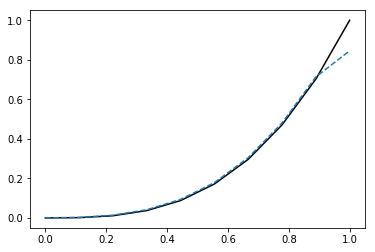

In [20]:
x = np.linspace(0,1,10)
dx = x[1] - x[0]

## YOUR CODE HERE
def F(x):
    return x**4 / 4

plt.plot(x,x**3,'-',color = 'black')
plt.plot(x,np.gradient(F(x),dx),'--')

(ii) $g(x) = \ln(x+1)$

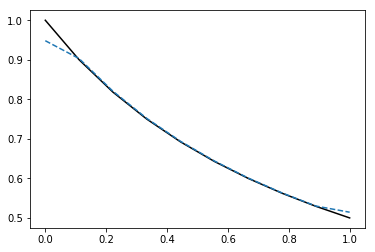

In [21]:
## YOUR CODE HERE
import math

def G(x):
    x = x+1
    return [math.log(num) for num in x]

plt.plot(x,1/(x+1),'-',color = 'black')
plt.plot(x,np.gradient(G(x),dx),'--')

(iii) $h(x) = e^{-x^2}$

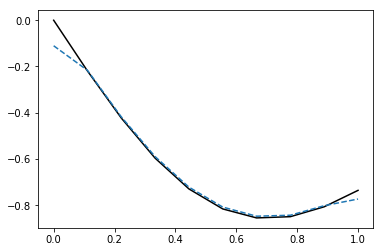

In [22]:
## YOUR CODE HERE
from math import e

def H(x):
    return e**(-(x**2))

plt.plot(x,-2*x*e**(-(x**2)),'-',color = 'black')
plt.plot(x,np.gradient(H(x),dx),'--')

### Part B (8 points)

_(Adapted from Langtangen B.8.)_

Consider the following function:

\\[
f(x) = \cos (e^{10x}) \\
\\]

Use `np.gradient` to construct a numerical approximations to its derivative $f'(x)$, in the interval $0 \leq x \leq 1$.  Then __plot your numerical result for $f'(x)$__, using the linspace `x_f` provided below with 5000 points in it.

_(Hint: the y-range of your plot should go from about -5000 to 5000.  If it goes from -1 to 1, something is wrong with your derivative!)_

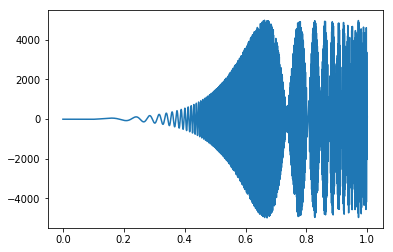

In [23]:
x_d = np.linspace(0,1,5000)

## YOUR CODE HERE
def F1(x):
    return np.cos(e**(10*x))

x_f = np.gradient(F1(x_d), 1/5000)

plt.plot(x_d,x_f)


The _analytic_ derivative of this function can be calculated in this case, giving:

\\[
f'(x) = -10 e^{10x} \sin (e^{10x}).
\\]

__Plot the analytic derivative $f'(x)$ below__, using the same discrete x-range `x_d` from above.

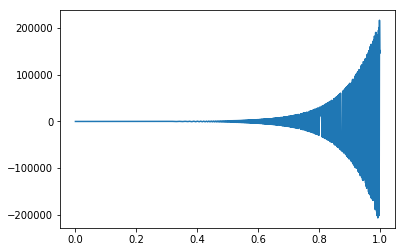

In [24]:
## YOUR CODE HERE
plt.plot(x_d,-10*e**(10*x_d) * np.sin(e**(10*x_d)))

In the Markdown cell below, __explain why the two plots look so different__, even though they use the same discrete grid of points `x_d`.

Then in the code cell after that, __copy/paste your code for plotting the numerical `f'(x)`__, and increase the number of points until it roughly matches the plot of the analytic derivative by eye.

_Type your answer here using Markdown._

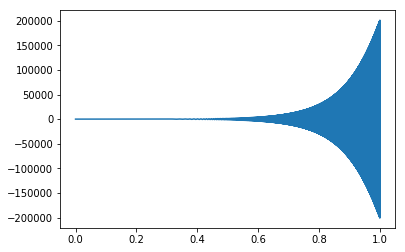

In [25]:
# Copy your plotting code for the numerical f'(x) here,
# and try to change the number of points in x_d!

## YOUR CODE HERE
number_of_points = 300000

x_d = np.linspace(0,1,number_of_points)

def F1(x):
    return np.cos(e**(10*x))

x_f = np.gradient(F1(x_d), 1/number_of_points)

plt.plot(x_d,x_f)

## 8.3 - The other Newton's law (14 points)

_(Adapted from Langtangen E.12)_

We all know about Newton's three laws of motion, but there's actually another 'law' discovered by and named after Sir Isaac Newton: __Newton's law of cooling__.  The law states that if an object at temperature $T$ exists in an environment with ambient temperature $T_a < T$, then the rate of heat loss can be described using the simple differential equation

$$
\frac{dT}{dt} = -h (T - T_a)
$$

where the (positive) heat loss constant $h$ must be determined experimentally for a given object (and environment, if different.)

### Part A (4 points)

Write a _discrete_ version of this differential equation using Euler's method, i.e. rewrite it in the form

$$
T_{i+1} = T_i + F(t_i, T_i) \Delta t
$$

$$
T_{i+1} = T_i + -h (T_i - T_a) (t_{i+1}-t_i)
$$

Suppose a freshly brewed mug of coffee has an initial temperature of $T = 85.0^\circ\ C$ (185 degrees F, which is too hot to drink!)  After waiting 30 seconds, you measure the temperature again and it has reduced slightly to $82.5^\circ C$.  The room is at a constant temperature of $20^\circ $. 

Using the discrete equation you just derived, __estimate the constant $h$ for the cup of coffee.__

h=0.001282

### Part B (6 points)

__Implement the function `cool_solve` below__, which should carry out a numerical solution of the differential equation you wrote in part A.  (Refer back to lecture/tutorial 17 and the `euler_solve` function we wrote there if you're not sure how to set this up.)

In [26]:
def cool_solve(T0, Ta, h, t_max, dt):
    """
    Solve Newton's law of cooling using Euler's method,
    for the given step size dt.
    
    Arguments:
    ----
    * T0: initial temperature of the cooling object, in degrees C.
    * Ta: ambient temperature of the environment, in degrees C.
    * h: heat constant, in inverse seconds.
    * t_max: how long to run the solution for, in seconds.
    * dt: step size to use, in seconds.
    
    Returns:
    ----
    * t_sol, T_sol: arrays containing the discretized interval {t_i} and the solution {T_i}.
    """
    
    ## YOUR CODE HERE
    t_sol = np.arange(0,t_max+dt,dt)
    index_num = int(t_max/dt)
    T_sol = np.zeros(index_num+1)
    T_sol[0] = 85

    for i in range(0,index_num,1):
        T_sol[i+1] = T_sol[i] - h*(T_sol[i]-Ta)*dt

    return (t_sol,T_sol)
    

In [27]:
# Hidden testing cell - do not delete!
import numpy.testing as npt


Now __make a plot of your solution in the cell below__, using a step size of $dt = 1$ s and evolving for 1 hour (3600 s.)

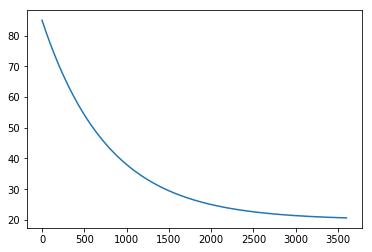

In [28]:
## YOUR CODE HERE
(t_sol, T_sol) = cool_solve(85, 20, 0.001282, 3600, 1)
plt.plot(t_sol, T_sol)

### Part C (4 points)

The coffee will be safe to drink at about $60^\circ C$ ($140^\circ F$); how long do you have to wait to have a sip?  How long will it take to reach $25^\circ C$, which is generally considered room temperature?

__Use the numerical solution that you plotted in part B to answer this question;__ there is an analytic solution, but I want the Euler's method answer, not the exact analytic answer.  (They're not that far apart, really; you could use the analytic answer to check your work here.)

_(Hint: remember, the `.argmin()` function will find the index of the smallest value in an array.  You can use that to find where your solution for `T` passes closest to a certain value, and then find the corresponding time.)_

In [45]:
## YOUR CODE HERE
def Find(C):
    for T,t in zip(T_sol,t_sol):
        if T <= C:
            return t

print("Wait for",Find(60),"s")
print("It takes",Find(25),"s")

Wait for 379 s
It takes 2000 s
